<table align="left">
  <td>
    <a target="_blank" href=""><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# New Section

In [ ]:
from tensorflow import keras
from pathlib import Path

DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = Path("C:\\Users\\kghiy\\.keras\\datasets\\quickdraw\\"+
                          FILENAME)
if not Path.is_file(filepath):
    filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

1065304064/1065301781 [==============================] - 5s 0us/step


In [ ]:
import os
from pathlib import Path

quickdraw_dir = Path(filepath).parent
os.listdir(quickdraw_dir)

['eval.tfrecord-00005-of-00010',
 'training.tfrecord-00003-of-00010',
 'eval.tfrecord-00009-of-00010',
 'training.tfrecord.classes',
 'training.tfrecord-00001-of-00010',
 'training.tfrecord-00005-of-00010',
 'eval.tfrecord-00000-of-00010',
 'training.tfrecord-00008-of-00010',
 'eval.tfrecord-00008-of-00010',
 'training.tfrecord-00004-of-00010',
 'training.tfrecord-00007-of-00010',
 'quickdraw_tutorial_dataset_v1.tar.gz',
 'eval.tfrecord-00003-of-00010',
 'eval.tfrecord-00006-of-00010',
 'eval.tfrecord-00002-of-00010',
 'eval.tfrecord-00004-of-00010',
 'training.tfrecord-00000-of-00010',
 'eval.tfrecord.classes',
 'eval.tfrecord-00001-of-00010',
 'training.tfrecord-00006-of-00010',
 'training.tfrecord-00002-of-00010',
 'eval.tfrecord-00007-of-00010',
 'training.tfrecord-00009-of-00010']

In [ ]:

train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
test_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [ ]:
with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    names = train_classes_file.readlines()
names[:5]

['garden hose\n', 'lighter\n', 'penguin\n', 'tractor\n', 'sheep\n']

In [ ]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_names = test_classes_file.readlines()
names == test_names

True

In [ ]:
names = [name.strip() for name in names]
names[:5],len(names)


(['garden hose', 'lighter', 'penguin', 'tractor', 'sheep'], 345)

In [ ]:
import tensorflow as tf

batch_size = 32

train_set = tf.data.TFRecordDataset(train_files).batch(batch_size)
test_set = tf.data.TFRecordDataset(test_files).batch(batch_size)

len([_ for _ in train_set.as_numpy_iterator()]), \
len([_ for _ in test_set.as_numpy_iterator()])

Result: (107813, 10782)

In [ ]:
# train_set = tf.data.TFRecordDataset(train_files[2:]).batch(batch_size)
valid_set = tf.data.TFRecordDataset(test_files[:5]).batch(batch_size)
test_set = tf.data.TFRecordDataset(test_files[5:]).batch(batch_size)

In [ ]:

for x in train_set.take(1):
    for y in x:
        print(y.numpy())
        break

b'\n\xcc\x05\n\xa2\x05\n\x03ink\x12\x9a\x05\x12\x97\x05\n\x94\x05\x80B\xa1<\xa0\xb6P=\x00\x00\x00\x00\x10\x02\x01= r\x02=\x00\x00\x00\x00\xe8\xf3\xf9=\x80\xb6P\xbc\x00\x00\x00\x00 \x12\x89=\xa0\xb6P\xbd\x00\x00\x00\x00\x00\x02\x81\xbc\xda\xf7\x08\xbe\x00\x00\x00\x00\x90\xc3a\xbd\xcc\x9f6\xbe\x00\x00\x00\x00\x00\x83A\xbd\xcc\x9f6\xbd\x00\x00\x00\x00\xc0b1\xbd\xa0\xb6\xd0\xbb\x00\x00\x00\x00\xd0\xe3q\xbd\xa0\xb6P=\x00\x00\x00\x00\xe4r\xb9\xbd6\xabC>\x00\x00\x00\x00\x00\x02\x81\xbbp\xcd\xea=\x00\x00\x00\x00\x08\x83A=\xa8\xe2\xb9>\x00\x00\x00\x00\x80B!=\xa0\xb6P=\x00\x00\x00\x00\x90\xc3a=\x80\xb6P<\x00\x00\x00\x00\x88\xc3\xe1= r\x02\xbd\x00\x00\x00\x00@\xa3Q=\xd0\x9f6\xbd\x00\x00\x00\x00\x84B!>T<W\xbe\x00\x00\x00\x00\x08\x83\xc1=\x08\xc2\xdd\xbd\x00\x00\x00\x00\x00\x02\x81;(r\x82\xbd\x00\x00\x00\x00\xc0b1\xbd\xa0\xb6P\xbe\x00\x00\x00\x00\x90\xc3a\xbd\x8d}\x0f\xbe\x00\x00\x00\x00\x00\x02\x81\xbdb\x94\xa9\xbd\x00\x00\x00\x00(\x93I\xbet\xcd\xea\xbd\x00\x00\x00\x00t:\x1d\xbe\x00\x00\x00\x00\x0

In [ ]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    sketches = tf.reshape(tf.sparse.to_dense(examples["ink"]),
                          (tf.size(data_batch), -1, 3))
    labels = examples["class_index"]
    return sketches, labels[:, 0]

train_set = train_set.map(parse)
valid_set = valid_set.map(parse)
test_set = test_set.map(parse)

In [ ]:
for ink, class_index in train_set.take(1):
    print("ink crop\n", ink[0][:5],
          "\nclass_index\n", class_index[0])
    break

ink crop
 tf.Tensor(
[[ 0.01968503  0.05095541  0.        ]
 [ 0.03149611  0.03184712  0.        ]
 [ 0.12204725 -0.01273882  0.        ]
 [ 0.0669291  -0.05095541  0.        ]
 [-0.01574802 -0.13375798  0.        ]], shape=(5, 3), dtype=float32) 
class_index
 tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
import numpy as np
from collections import Counter

labels = [label for _,label in valid_set.take(500)]
class_indexes = np.concatenate(labels)
index_counts = Counter(class_indexes)
min(index_counts.values()), max(index_counts.values())


(30, 66)

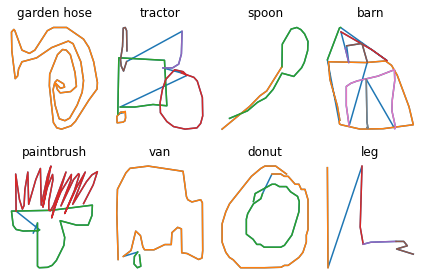

In [ ]:
import matplotlib.pyplot as plt

def draw_image(ink, label):
    origin_points = [[0., 0., 0.]]
    points = np.r_[origin_points, ink]
    line_indices = np.argwhere(points[:, -1])[:,0]
    coordinates = np.cumsum(points[:, :2], axis=0)
    strokes = np.split(coordinates, line_indices + 1)
    plt.plot(coordinates[:, 0], -coordinates[:, 1])
    
    for stroke in strokes:
       plt.plot(stroke[:, 0], -stroke[:, 1])

    plt.axis("off")
    plt.title(names[label])

for inks,labels in train_set.take(1):
    for i in range(8):
        plt.subplot(2, 4, i+1)
        draw_image(inks[i], labels[i])
        plt.tight_layout()

plt.show()

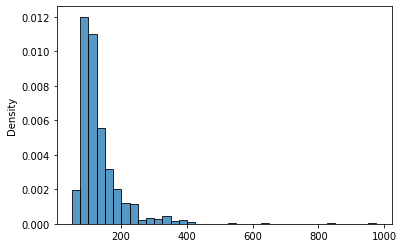

In [ ]:
import seaborn as sns
sample_lengths = [len(samples[0]) for samples,_ in train_set.take(1000)]
sns.histplot(x=sample_lengths, binwidth=25, stat="density")
plt.show()

In [ ]:
# def reshape(inks, labels):
#     return inks[:, :100, :], labels

# train_set.map(reshape)
# valid_set.map(reshape)
# test_set.map(reshape)

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu", input_shape=(None, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(256, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(256, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(len(names), activation="softmax")                              
])

optimizer = keras.optimizers.RMSprop(lr=1e-4)
metric = keras.metrics.SparseTopKCategoricalAccuracy(k=2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", metric])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 64)          1024      
_________________________________________________________________
batch_normalization (BatchNo (None, None, 64)          256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 128)         512       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 256)         98560     
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 256)         1024      
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         5

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_set, epochs=7, validation_data=valid_set, callbacks=[early_stopping], verbose=2)

Epoch 1/7
107813/107813 - 1035s - loss: 3.3262 - accuracy: 0.3029 - sparse_top_k_categorical_accuracy: 0.4133 - val_loss: 2.3299 - val_accuracy: 0.4742 - val_sparse_top_k_categorical_accuracy: 0.6097
Epoch 2/7
107813/107813 - 1034s - loss: 2.1980 - accuracy: 0.5011 - sparse_top_k_categorical_accuracy: 0.6364 - val_loss: 1.9404 - val_accuracy: 0.5539 - val_sparse_top_k_categorical_accuracy: 0.6879
Epoch 3/7
107813/107813 - 1032s - loss: 1.9623 - accuracy: 0.5543 - sparse_top_k_categorical_accuracy: 0.6892 - val_loss: 1.8266 - val_accuracy: 0.5875 - val_sparse_top_k_categorical_accuracy: 0.7195
Epoch 4/7
107813/107813 - 1008s - loss: 1.8669 - accuracy: 0.5811 - sparse_top_k_categorical_accuracy: 0.7154 - val_loss: 1.7702 - val_accuracy: 0.6077 - val_sparse_top_k_categorical_accuracy: 0.7390
Epoch 5/7
107813/107813 - 992s - loss: 1.8026 - accuracy: 0.5979 - sparse_top_k_categorical_accuracy: 0.7311 - val_loss: 1.7405 - val_accuracy: 0.6188 - val_sparse_top_k_categorical_accuracy: 0.7483
E

In [ ]:
y_test = np.concatenate([labels for _, labels in test_set])
y_probas = model.predict(test_set)
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas, k=1))

In [ ]:
from google.colab import drive

# drive.mount('/content/gdrive')
# model = keras.models.load_model('/content/gdrive/MyDrive/sketchRNN')
# model.save('/content/gdrive/MyDrive/sketchRNNFull')